# Financial Data Statistics

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read in dataset we downloaded earlier
data = pd.read_csv('./data/all_stocks_5yr.csv', parse_dates=True)

In [3]:
# look at starbucks
sbux = data[data['Name'] == 'SBUX'].copy()
sbux.head()

,date,open,high,low,close,volume,Name
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


<AxesSubplot:>

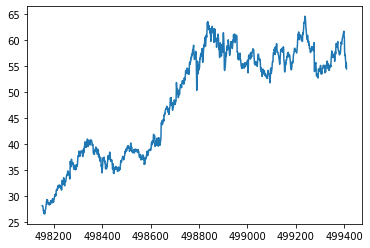

In [4]:
# plot this data
sbux['close'].plot()
plt.show()

In [5]:
# create column of previous close - the last trading day close price
sbux['prev_close'] = sbux['close'].shift(1)

In [6]:
# view the data to confirm
sbux.head()

,date,open,high,low,close,volume,Name,prev_close
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915


In [7]:
# calculate the return
sbux['return'] = sbux['close'] / sbux['prev_close'] - 1

In [8]:
# view the data to confirm
sbux.head()

,date,open,high,low,close,volume,Name,prev_close,return
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015


In [9]:
# can calculate return directly using pct_change function
sbux['return2'] = sbux['close'].pct_change(1)
sbux.head()

,date,open,high,low,close,volume,Name,prev_close,return,return2
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080,-0.004080
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138,0.002138
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643,-0.007643
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015,-0.005015


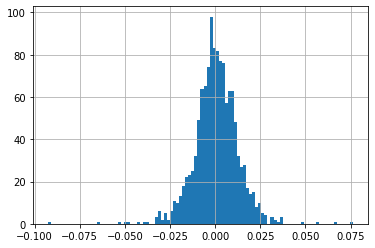

In [10]:
# create histogram of returns
sbux['return'].hist(bins=100)
plt.show()

In [11]:
# calc some statistics on our returns - sample mean and var
sbux['return'].mean(), sbux['return'].std()

(0.0006002332205830914, 0.012360934026133879)

In [12]:
# calc the log return
sbux['log_return'] = np.log(sbux['return'] + 1)
sbux.head()

,date,open,high,low,close,volume,Name,prev_close,return,return2,log_return
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN,NaN,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080,-0.004080,-0.004089
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138,0.002138,0.002135
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643,-0.007643,-0.007672
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015,-0.005015,-0.005028


Note that with very small returns, the log return and return are approximately equal.

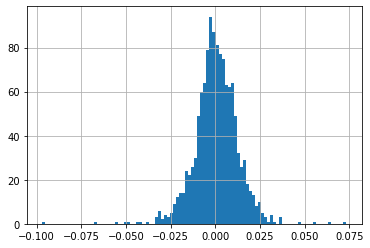

In [13]:
# histogram of log returns
sbux['log_return'].hist(bins=100)
plt.show()

In [14]:
# recalc  statistics on our log returns - sample mean and var
sbux['log_return'].mean(), sbux['log_return'].std()

(0.0005235902748108682, 0.012381234216101258)

## Normal Distribution

In [22]:
# imports
from scipy.stats import norm
from scipy.stats import probplot
import statsmodels.api as sm

In [17]:
# create comparison between histograms of our data and a normal dist

# x list is based on min and max returns observed
x_list = np.linspace(sbux['return'].min(), sbux['return'].max(), 100)
# y list is from the normal dist, with mean and stdev equal to that of our sample returns
y_list = norm.pdf(x_list, loc=sbux['return'].mean(), scale=sbux['return'].std())

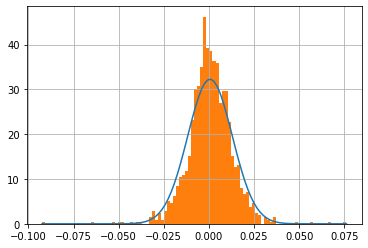

In [18]:
# create plot to compare the two
plt.plot(x_list, y_list)
sbux['return'].hist(bins=100, density=True)
plt.show()

Not a great fit to the normal distribution.  Let's confirm with QQ-Plot.

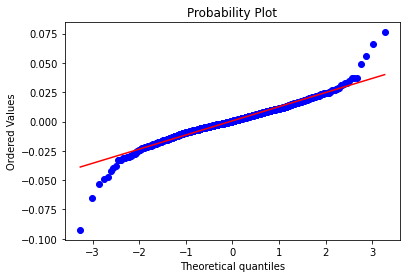

In [21]:
# create QQ-plot
probplot(sbux['return'].dropna(), dist='norm', fit=True, plot=plt)
plt.show()

Significant divergence at the ends of the plot.  Again, not a great fit to normal.

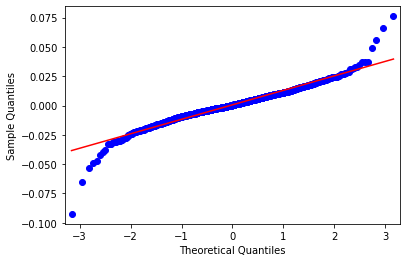

In [24]:
# create the QQ-plot using statsmodels
sm.qqplot(sbux['return'].dropna(), line='s');

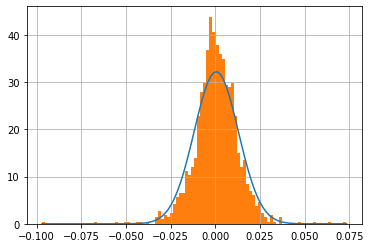

In [25]:
# let's redo the above using the log returns instead
x_list = np.linspace(sbux['log_return'].min(), sbux['log_return'].max(), 100)
y_list = norm.pdf(x_list, loc=sbux['log_return'].mean(), scale=sbux['log_return'].std())

plt.plot(x_list, y_list)
sbux['log_return'].hist(bins=100, density=True)
plt.show()

Again, this is not a great fit for log returns either.  This looks almost identical to the previous plot, as log returns and returns are very close.

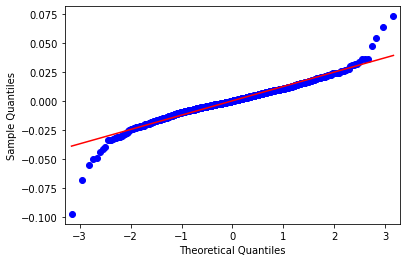

In [26]:
# let's redo the QQ plot too
sm.qqplot(sbux['log_return'].dropna(), line='s');

Again, we see that our distribution has heavier tails than the normal distribution.

## t-Distribution

In [27]:
# imports
from scipy.stats import t # careful not to use t for anything else later

In [28]:
# create x_list for returns again
x_list = np.linspace(sbux['return'].min(), sbux['return'].max(), 100)

In [29]:
# fit a t-dist to returns
params = t.fit(sbux['return'].dropna())
params

(4.78753221828017, 0.0007108616716254146, 0.009341981642040986)

In [30]:
# assign the params to degrees of freedom, location, and scale
dof, loc, scale = params

In [31]:
# create y_list from our fitted distribution
y_list = t.pdf(x_list, dof, loc, scale)

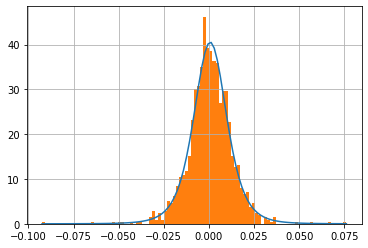

In [32]:
# plot our histogram against the t-dist
plt.plot(x_list, y_list)
sbux['return'].hist(bins=100, density=True)
plt.show()

The t-dist is a much better fit than the normal distribution.

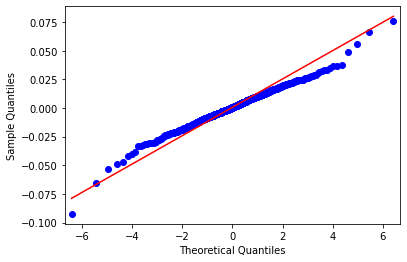

In [35]:
# review the QQ-plot for t-dist
sm.qqplot(sbux['return'].dropna(), dist=t, distargs=(dof,), line='s');

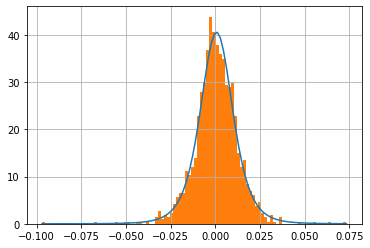

In [36]:
# redo the above for log returns
x_list = np.linspace(sbux['log_return'].min(), sbux['log_return'].max(), 100)
params = t.fit(sbux['log_return'].dropna())
dof, loc, scale = params
y_list = t.pdf(x_list, dof, loc, scale)

plt.plot(x_list, y_list)
sbux['log_return'].hist(bins=100, density=True)
plt.show()

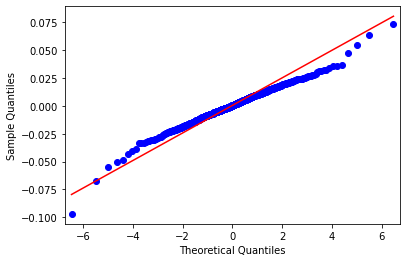

In [37]:
# redo QQ-plot
sm.qqplot(sbux['log_return'].dropna(), dist=t, distargs=(dof,), line='s');

Again we see very little difference between the returns and log returns, and the t-distribution is a much better fit than the normal distribution.

## Skewness and Kurtosis

In [38]:
# calculate skewness
sbux['return'].skew()

-0.2680784195824153

In [39]:
# calculate excess kurtosis
sbux['return'].kurtosis()

5.593158903424731

In [40]:
# calc skewness of log returns
sbux['log_return'].skew()

-0.41015501490182066

In [41]:
# calc excess kurtosis of log returns
sbux['log_return'].kurtosis()

5.964502225799283

The skew in both cases is negative - these returns are somewhat left-tailed meaning more likely to get extreme negative returns.  The excess kurtosis in both cases is almost 6 - these returns have heavier tails than the normal distribution, meaning more likely to get extreme values.

## Confidence Intervals